# Intro to OpenAI Gym
## Some of the basics of openAI Gym

Adopted from the intro given at http://gym.openai.com/docs/

In [10]:
import gym # import the gym library
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

### A quick example

Before we understand anything, let's just take a look at what this thing can do.

In [11]:
from gym import envs
# print(envs.registry.all())

In [12]:
environment = 'CartPole-v0'
# environment = 'Pendulum-v0'

In [6]:
# A quick run of the CartPole enviroment with random actions
# prints out the observations
env = gym.make(environment)
for i_episode in range(10):
    observation = env.reset()
    for t in range(50):
        env.render()
        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

[-0.00094668 -0.00555971  0.04342875  0.02607188]
[-0.00105787 -0.20127669  0.04395019  0.33213458]
[-0.0050834  -0.00680698  0.05059288  0.05362889]
[-0.00521954  0.18755441  0.05166546 -0.22267218]
[-0.00146846  0.38190129  0.04721202 -0.49862062]
[ 0.00616957  0.57632692  0.03723961 -0.77605892]
[ 0.01769611  0.77091743  0.02171843 -1.05679641]
[ 3.31144571e-02  9.65744946e-01  5.82498982e-04 -1.34258404e+00]
[ 0.05242936  1.16085956 -0.02626918 -1.63508466]
[ 0.07564655  0.9660555  -0.05897088 -1.35070164]
[ 0.09496766  0.77172181 -0.08598491 -1.0770352 ]
[ 0.11040209  0.57783438 -0.10752561 -0.81252693]
[ 0.12195878  0.38433659 -0.12377615 -0.55550816]
[ 0.12964551  0.58095913 -0.13488631 -0.88448292]
[ 0.1412647   0.77762929 -0.15257597 -1.21634495]
[ 0.15681728  0.5847683  -0.17690287 -0.9750977 ]
[ 0.16851265  0.39240346 -0.19640482 -0.74279227]
Episode finished after 17 timesteps
[-0.00232421 -0.0242145  -0.00066849  0.04126142]
[-2.80849817e-03 -2.19326854e-01  1.56743197e-04

[-0.24423509 -1.1014952  -0.09338371  0.37436205]
[-0.266265   -1.29517519 -0.08589647  0.63620128]
[-0.2921685  -1.4890008  -0.07317244  0.90064528]
[-0.32194852 -1.68305906 -0.05515954  1.16946024]
[-0.3556097  -1.87742188 -0.03177033  1.44435238]
[-0.39315814 -2.07213878 -0.00288328  1.72694143]
[-0.43460091 -1.87698398  0.03165554  1.43336277]
[-0.47214059 -2.07248185  0.0603228   1.73576783]
[-0.51359023 -2.26823756  0.09503816  2.04659146]
[-0.55895498 -2.46419741  0.13596999  2.36710393]
[-0.60823893 -2.27052091  0.18331206  2.11912267]
Episode finished after 45 timesteps
[-0.03535469 -0.00570562 -0.01910985 -0.00204504]
[-0.03546881 -0.20054837 -0.01915075  0.28454777]
[-0.03947977 -0.00515859 -0.0134598  -0.01411313]
[-0.03958295  0.19015378 -0.01374206 -0.31101221]
[-0.03577987 -0.00476972 -0.01996231 -0.02269461]
[-0.03587526  0.19063273 -0.0204162  -0.32160843]
[-0.03206261  0.38603938 -0.02684837 -0.62065926]
[-0.02434182  0.5815258  -0.03926155 -0.92167567]
[-0.01271131  

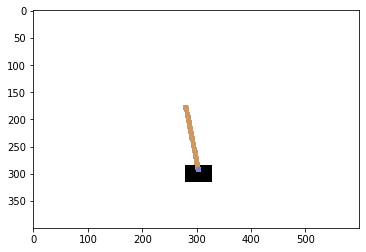

In [13]:
# same as above, but now it displays the environment
env = gym.make(environment) 
for i_episode in range(10):
    observation = env.reset()
    for t in range(50):
        plt.imshow(env.render(mode='rgb_array'))
        display.display(plt.gcf())    
        display.clear_output(wait=True)
        env.step(env.action_space.sample()) # take a random action
        env.render()
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            break
env.close()

### Spaces
In the examples above, we’ve been sampling random actions from the environment’s action space. But what actually are those actions? Every environment comes with an action_space and an observation_space. These attributes are of type Space, and they describe the format of valid actions and observations:

In [8]:
env = gym.make(environment)
print(env.action_space)
print(env.observation_space)

Discrete(2)
Box(4,)


In [9]:
print(env.observation_space.high)
print(env.observation_space.low)

[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


In [6]:
from gym import spaces
space = spaces.Discrete(8) # Set with 8 elements {0, 1, 2, ..., 7}
x = space.sample()
assert space.contains(x)
assert space.n == 8